# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_hous= pd.read_csv("D:/Studing DATA/Model_python/data/House_Rent_Dataset_origin.csv")
print(df_hous.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None


In [4]:
df_hous.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [5]:
print(df_hous.isnull().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [6]:
stats = df_hous[['BHK', 'Rent', 'Size', 'Bathroom']].describe()
stats.round(2)

,BHK,Rent,Size,Bathroom
count,4746.00,4746.00,4746.00,4746.00
mean,2.08,34993.45,967.49,1.97
std,0.83,78106.41,634.20,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


##### Аналіз
як ми бачимо з 2 наступних графіків підтверджується розподіл Орендної плати, дуже велике стд,та неймовірно різко високі ціни, що сприймаються як викиди, статистично воно так і є , 75% данних містять ціни до 33 000 , і середнє 34993, тобто має розподіл з хвостом в право , тобто правосторонній розподіл. 3,5М це явно виикид, а от до 500К данні ще тягнуться , після ще повторюються трошки значень, але мало даних в діапазоні 500К до 1,25М.

[Text(0.5, 1.0, 'Розподіл Rent'),
 Text(0.5, 0, 'Rent'),
 Text(0, 0.5, 'Кількість')]

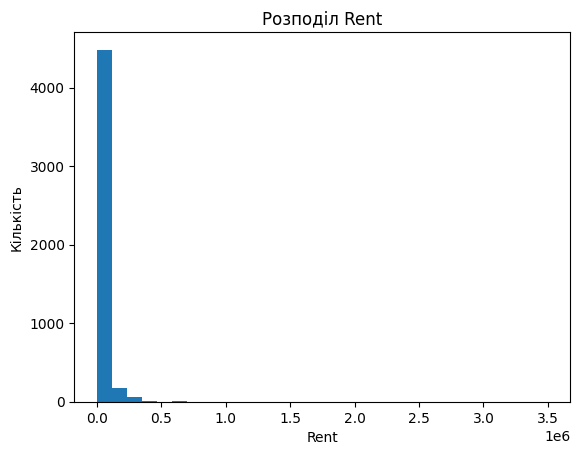

In [7]:
df_hous["Rent"] = pd.to_numeric(df_hous["Rent"], errors="coerce")
(df_hous["Rent"].plot.hist(bins=30)).set(title="Розподіл Rent", xlabel="Rent", ylabel="Кількість")

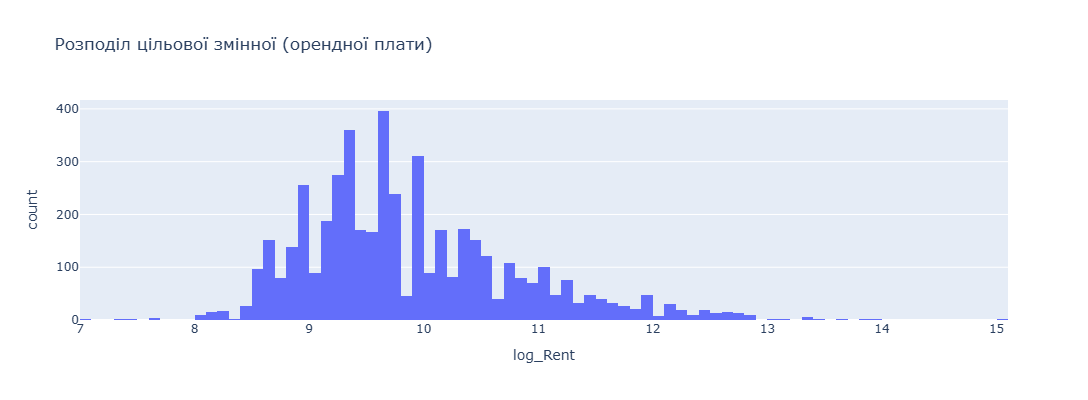

In [8]:
df_clean = df_hous.copy()
df_clean['log_Rent'] = np.log1p(df_hous["Rent"])
fig = px.histogram(
    df_clean,
    x='log_Rent',
    nbins=100,
    title='Розподіл цільової змінної (орендної плати)',
    labels={'log_target': 'log Кількість даних', 'count': 'ціна оренди'}
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()

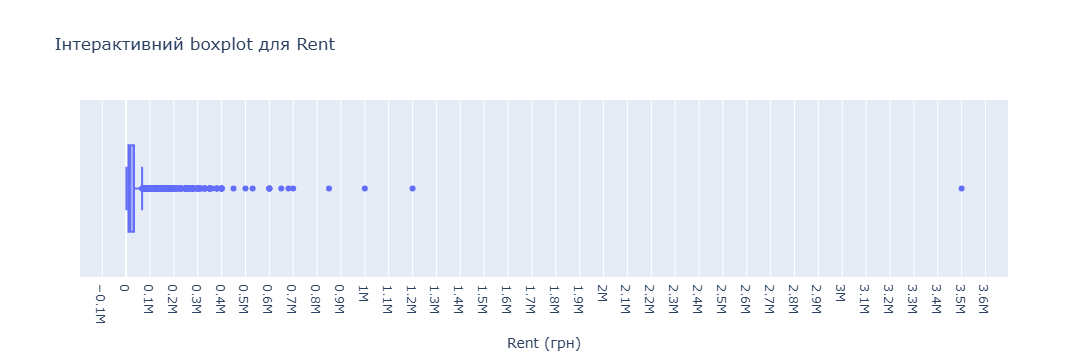

In [9]:
import plotly.express as px

fig = px.box(df_hous, x="Rent", orientation="h", title="Інтерактивний boxplot для Rent")

# Крок поділки 100 000
fig.update_xaxes(dtick=100000, title="Rent (грн)")

fig.show()


In [10]:
# 1. Розрахунок квартилів і IQR
Q1 = df_hous["Rent"].quantile(0.25)
Q3 = df_hous["Rent"].quantile(0.75)
IQR = Q3 - Q1

# 2. Межі для викидів
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
print(f"Межі викидів: нижня = {lower_bound}, верхня = {upper_bound}")

# 3. Фільтрація (видаляємо викиди)
df_hous_no_outliers = df_hous[(df_hous["Rent"] >= lower_bound) & (df_hous["Rent"] <= upper_bound)]

print(f"Було рядків: {len(df_hous)}, залишилось: {len(df_hous_no_outliers)}")


Q1 = 10000.0, Q3 = 33000.0, IQR = 23000.0
Межі викидів: нижня = -24500.0, верхня = 67500.0
Було рядків: 4746, залишилось: 4226


In [11]:
df_hous_no_outliers.to_csv("D:/Studing DATA/Model_python/data/House_Rent_Dataset.csv", index=False)
print(df_hous_no_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4226 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4226 non-null   object
 1   BHK                4226 non-null   int64 
 2   Rent               4226 non-null   int64 
 3   Size               4226 non-null   int64 
 4   Floor              4226 non-null   object
 5   Area Type          4226 non-null   object
 6   Area Locality      4226 non-null   object
 7   City               4226 non-null   object
 8   Furnishing Status  4226 non-null   object
 9   Tenant Preferred   4226 non-null   object
 10  Bathroom           4226 non-null   int64 
 11  Point of Contact   4226 non-null   object
dtypes: int64(4), object(8)
memory usage: 429.2+ KB
None


In [12]:
df_hous_no_outliers.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [13]:
# Вказуємо свої категоріальні колонки
categorical_cols = ['BHK', 'Floor', 'Area Type', 'Area Locality','City','Furnishing Status','Point of Contact' ]

# Для кожної колонки виводимо унікальні значення і їх кількість
for col in categorical_cols:
    print(f"Колонка: {col}")
    print(df_hous_no_outliers[col].value_counts())
    print("\n" + "-"*30 + "\n")

Колонка: BHK
BHK
2    2165
1    1156
3     838
4      56
6       6
5       5
Name: count, dtype: int64

------------------------------

Колонка: Floor
Floor
1 out of 2          374
Ground out of 2     346
2 out of 3          305
2 out of 4          295
1 out of 3          281
                   ... 
Ground out of 14      1
2 out of 11           1
12 out of 30          1
6 out of 13           1
23 out of 34          1
Name: count, Length: 340, dtype: int64

------------------------------

Колонка: Area Type
Area Type
Super Area     2383
Carpet Area    1841
Built Area        2
Name: count, dtype: int64

------------------------------

Колонка: Area Locality
Area Locality
Gachibowli                         28
Electronic City                    24
Velachery                          22
Miyapur, NH 9                      22
Madipakkam                         19
                                   ..
Paschim Barisha                     1
Tarulia, Keshtopur                  1
Natunhat          


## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


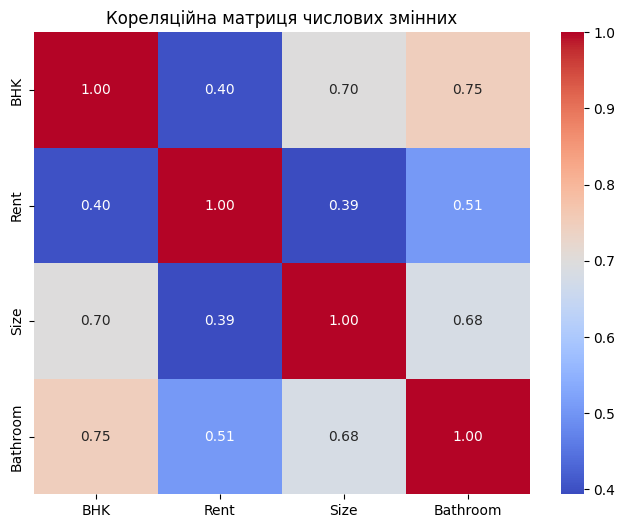

In [14]:
numeric_cols = ['BHK', 'Rent', 'Size', 'Bathroom']
correlation_matrix = df_hous_no_outliers[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кореляційна матриця числових змінних")
plt.show()

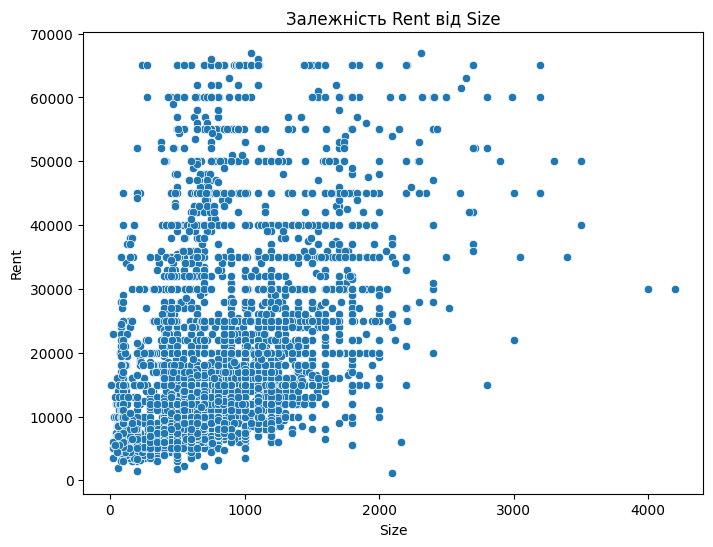

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_hous_no_outliers, x='Size', y='Rent')
plt.title('Залежність Rent від Size')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()

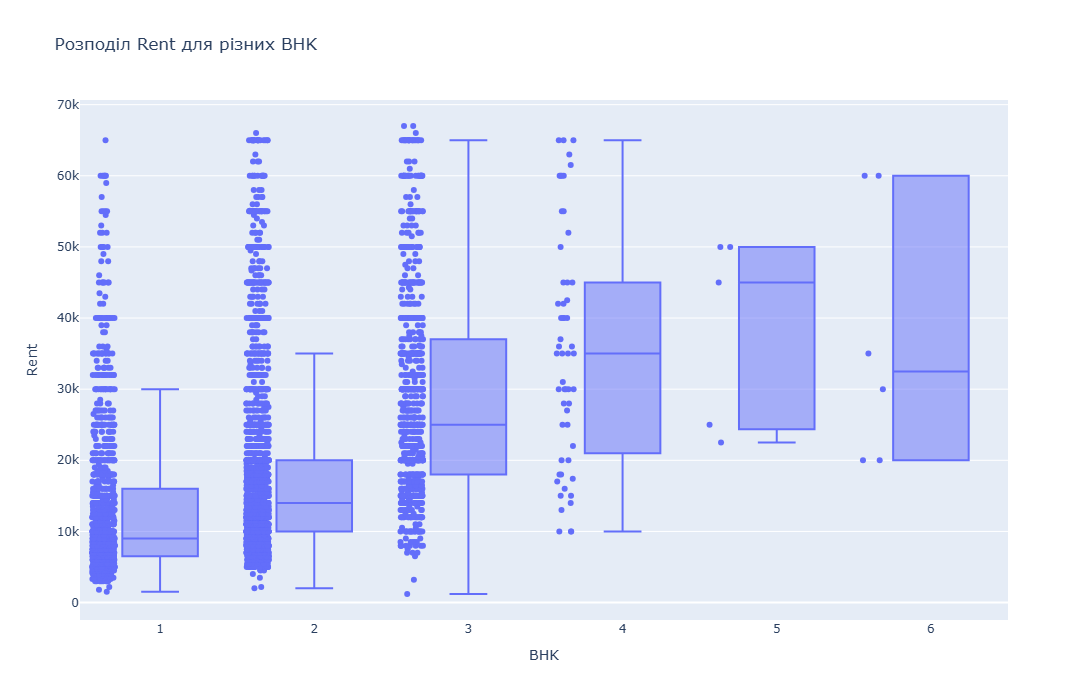

In [37]:
# Колонка: BHK
# BHK
# 2    2165
# 1    1156
# 3     838
# 4      56
# 6       6
# 5       5
# Name: count, dtype: int64
fig = px.box(
    df_hous_no_outliers,
    x='BHK',
    y='Rent',
    title='Розподіл Rent для різних BHK',
    points="all"  # показує всі точки на графіку
)

# Збільшуємо розмір фігури
fig.update_layout(
    width=1000,   # ширина
    height=700,   # висота
    xaxis_title='BHK',
    yaxis_title='Rent'
)

fig.show()

#### АНАЛІЗ
Знаючи розподіл унікальних значень, і тепер бачачи розподіл даних відносно орендної плати, добре видно, що категорії ВНК 1,2 мають найширший розкид орендної плати, а також на основі кореляційної таблиці, це підтверджує що насправці вплив ВНК на орендну прямий позитивний.Тенденція зростання Rent із збільшенням BHK чітко простежується.Викиди свідчать про наявність дуже дорогих або дуже дешевих квартир у кожній категорії.Для моделювання Rent можна розглядати BHK як важливу категоріальну ознаку, але враховувати розкид у 3-4 BHK.

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [16]:
area_type_dummies = pd.get_dummies(df_hous_no_outliers['Area Type'], prefix='Area Type')

In [15]:
df_hous_no_outliers['Area Type'].head()

0     Super Area
1     Super Area
2     Super Area
3     Super Area
4    Carpet Area
Name: Area Type, dtype: object

In [17]:
area_type_dummies.head().astype(int)

,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0


In [19]:
Point_of_Contact_dummies = pd.get_dummies(df_hous_no_outliers['Point of Contact'], prefix='Point of Contact') 
Point_of_Contact_dummies.head().astype(int)

,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [21]:
City_dummies = pd.get_dummies(df_hous_no_outliers['City'], prefix='City') 
City_dummies.head().astype(int)

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [22]:
Furnishing_dummies = pd.get_dummies(df_hous_no_outliers['Furnishing Status'], prefix='Furnishing Status') 
Furnishing_dummies.head().astype(int)

,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


In [26]:
df_hous_no_outliers['Floor'].head(10)

0    Ground out of 2
1         1 out of 3
2         1 out of 3
3         1 out of 2
4         1 out of 2
5    Ground out of 1
6    Ground out of 4
7         1 out of 2
8         1 out of 2
9         1 out of 3
Name: Floor, dtype: object

In [29]:
# Витягуємо перше значення (Ground або число) і друге (загальна кількість поверхів)
df_hous_no_outliers[['Apart_Floor', 'Total_Build_Floor']] = df_hous_no_outliers['Floor'].str.extract(r'(\w+|\d+)\s+out of\s+(\d+)')


df_hous_no_outliers.to_csv("D:/Studing DATA/Model_python/data/House_Rent_Dataset.csv", index=False)

df_hous_no_outliers.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18960\2938011012.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Apart_Floor,Total_Build_Floor
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [30]:
floor_cols = ['Apart_Floor', 'Total_Build_Floor']

# Для кожної колонки виводимо унікальні значення і їх кількість
for col in floor_cols:
    print(f"Колонка: {col}")
    print(df_hous_no_outliers[col].value_counts())
    print("\n" + "-"*30 + "\n")
    

Колонка: Apart_Floor
Apart_Floor
1           1111
2            904
Ground       902
3            473
4            242
5            129
6             62
10            51
7             50
8             46
9             39
15            28
Basement      28
12            27
11            26
14            18
13            14
17            12
18            11
16            11
19             9
23             6
20             6
25             5
26             3
21             3
24             2
34             1
48             1
30             1
28             1
Name: count, dtype: int64

------------------------------

Колонка: Total_Build_Floor
Total_Build_Floor
4     893
3     884
2     852
5     407
1     322
7     147
6      86
8      69
14     51
10     47
12     45
20     45
22     32
16     30
18     30
9      29
15     27
23     24
19     23
13     23
11     21
17     19
24     19
21     12
32      9
31      9
28      8
30      8
25      7
36      5
40      4
35      4
58      4
38    

In [43]:
# Вибираємо потрібні колонки
cols = ['BHK', 'Size', 'Bathroom']

# Обчислюємо матрицю кореляції
top_corr = df_hous_no_outliers[cols].corr()

# Дивимось перші рядки
print(top_corr.head())

               BHK      Size  Bathroom
BHK       1.000000  0.698453  0.747918
Size      0.698453  1.000000  0.680607
Bathroom  0.747918  0.680607  1.000000


In [37]:
df_hous_no_outliers['Total_Build_Floor'] = df_hous_no_outliers['Total_Build_Floor'].fillna(0).astype("Int64")

# Умови
conditions = [
    df_hous_no_outliers['Total_Build_Floor'] <= 5,                             # low-rise
    (df_hous_no_outliers['Total_Build_Floor'] > 5) & (df_hous_no_outliers['Total_Build_Floor'] < 21),  # multi-storey
    df_hous_no_outliers['Total_Build_Floor'] >= 21                              # skyscrapers
]

# Відповідні категорії
choices = [
    'low-rise building',
    'multi-storey building',
    'skyscrapers'
]

# Нова колонка
df_hous_no_outliers['Building_Category'] = np.select(conditions, choices, default='unknown')

print(df_hous_no_outliers[['Total_Build_Floor', 'Building_Category']].head(20))


C:\Users\user\AppData\Local\Temp\ipykernel_18960\3109389320.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_18960\3109389320.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    Total_Build_Floor  Building_Category
0                   2  low-rise building
1                   3  low-rise building
2                   3  low-rise building
3                   2  low-rise building
4                   2  low-rise building
5                   1  low-rise building
6                   4  low-rise building
7                   2  low-rise building
8                   2  low-rise building
9                   3  low-rise building
10                  4  low-rise building
11                  1  low-rise building
12                  4  low-rise building
13                  2  low-rise building
14                  2  low-rise building
15                  1  low-rise building
16                  2  low-rise building
17                  2  low-rise building
18                  3  low-rise building
19                  2  low-rise building


In [38]:
df_hous_no_outliers.to_csv("D:/Studing DATA/Model_python/data/House_Rent_Dataset.csv", index=False)

In [39]:
Building_Category_dummies = pd.get_dummies(df_hous_no_outliers['Building_Category'], prefix='Building_Category') 
Building_Category_dummies.head().astype(int)

,Building_Category_low-rise building,Building_Category_multi-storey building,Building_Category_skyscrapers
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [46]:
df_hous_no_outliers = pd.concat([
    df_hous_no_outliers,
    Building_Category_dummies,
    Furnishing_dummies,
    area_type_dummies,
    City_dummies,
    Point_of_Contact_dummies
], axis=1)

In [47]:
numeric_features = top_corr.columns.tolist()

# Повний список ознак
features = numeric_features + \
           Building_Category_dummies.columns.tolist() + \
           Furnishing_dummies.columns.tolist() + \
           area_type_dummies.columns.tolist() + \
           City_dummies.columns.tolist() + \
           Point_of_Contact_dummies.columns.tolist()

# Визначаємо X та y
X = df_hous_no_outliers[features]
y = df_hous_no_outliers['Rent']

print(f"\nРозмір X (ознак): {X.shape}")
print(f"Розмір y (цілі): {y.shape}")


Розмір X (ознак): (4226, 21)
Розмір y (цілі): (4226,)


In [52]:
from sklearn.preprocessing import StandardScaler
# Створюємо scaler
scaler = StandardScaler()

# Стандартизуємо лише числові колонки
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
# Розділяємо дані: 80% на навчання, 20% на тест
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y,
    test_size=0.2,  # 20% даних йде на тест
    random_state=42  # фіксуємо випадковість для відтворюваності
)

In [56]:
# Створюємо модель
model = LinearRegression()

# Навчаємо модель на навчальних даних
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
# Виводимо ваги для кожної ознаки
for feature, weight in zip(model.feature_names_in_, model.coef_):
    print(f"{feature}: {weight:.2f}")

print(f"\nЗміщення (intercept): {model.intercept_:.2f}")

BHK: 2510.41
Size: 3841.05
Bathroom: 1707.47
Building_Category_low-rise building: -699.96
Building_Category_multi-storey building: 420.37
Building_Category_skyscrapers: 641.40
Furnishing Status_Furnished: 1023.45
Furnishing Status_Semi-Furnished: -108.90
Furnishing Status_Unfurnished: -573.60
Area Type_Built Area: 54.25
Area Type_Carpet Area: 93.64
Area Type_Super Area: -96.01
City_Bangalore: -627.88
City_Chennai: -1147.32
City_Delhi: 280.77
City_Hyderabad: -1651.05
City_Kolkata: -1502.38
City_Mumbai: 5059.95
Point of Contact_Contact Agent: 1787.58
Point of Contact_Contact Builder: -17.61
Point of Contact_Contact Owner: -1786.39

Зміщення (intercept): 19321.82


In [59]:

# 4️⃣ Виводимо коефіцієнти
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nКоефіцієнти моделі (за абсолютним значенням):")
print(coefficients.head(10))

# 2 найбільші за впливом ознаки
top_2_features = coefficients.iloc[:2]
print("\nДві ознаки з найбільшим впливом на прогноз:")
print(top_2_features)

# 5️⃣ Прогнози
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\nПерші 5 прогнозів на тренувальних даних:", y_train_pred[:5])
print("Перші 5 прогнозів на тестових даних:", y_test_pred[:5])


Коефіцієнти моделі (за абсолютним значенням):
                           Feature  Coefficient
17                     City_Mumbai  5059.949995
1                             Size  3841.052196
0                              BHK  2510.405330
18  Point of Contact_Contact Agent  1787.575908
20  Point of Contact_Contact Owner -1786.387827
2                         Bathroom  1707.470771
15                  City_Hyderabad -1651.051035
16                    City_Kolkata -1502.378557
13                    City_Chennai -1147.315733
6      Furnishing Status_Furnished  1023.448882

Дві ознаки з найбільшим впливом на прогноз:
        Feature  Coefficient
17  City_Mumbai  5059.949995
1          Size  3841.052196

Перші 5 прогнозів на тренувальних даних: [20332.38428356 27054.63249641 12431.2722213  20228.68502845
 16828.64784202]
Перші 5 прогнозів на тестових даних: [27578.57326245  3391.47626177 39668.67057957  2916.48653718
 14772.07319096]


## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


=== Метрики якості моделі ===
Тренувальні дані -> MAE: 5489.03, RMSE: 7653.95, R²: 0.693
Тестові дані     -> MAE: 5433.91, RMSE: 7701.64, R²: 0.691

Модель має збалансовану якість: тренувальні та тестові метрики близькі.


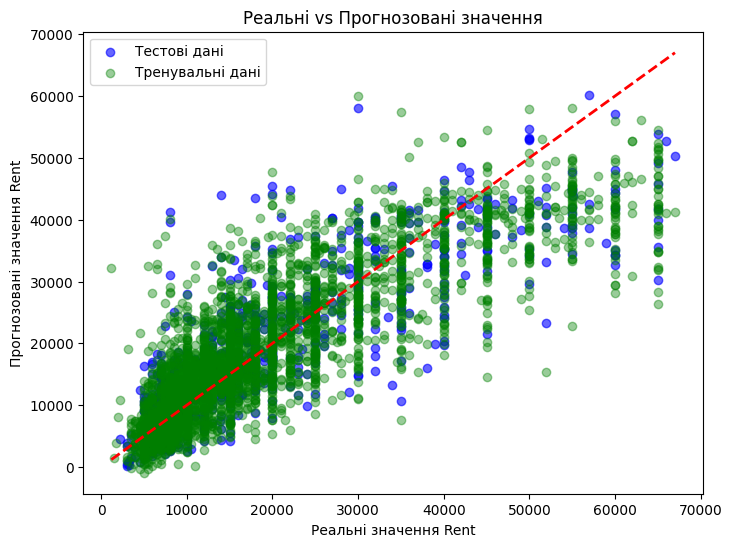

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1️⃣ Обчислюємо метрики для тренувальної вибірки
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# 2️⃣ Обчислюємо метрики для тестової вибірки
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# 3️⃣ Виводимо результати
print("=== Метрики якості моделі ===")
print(f"Тренувальні дані -> MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.3f}")
print(f"Тестові дані     -> MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.3f}")

# 4️⃣ Висновок про якість моделі
if r2_train > 0.8 and r2_test < r2_train - 0.2:
    print("\nМожливе перенавчання: модель дуже добре працює на тренувальних даних, але гірше на тестових.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("\nМожливе недонавчання: модель погано працює навіть на тренувальних даних.")
else:
    print("\nМодель має збалансовану якість: тренувальні та тестові метрики близькі.")

# 5️⃣ Графік "реальні vs прогнозовані значення"
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue', label='Тестові дані')
plt.scatter(y_train, y_train_pred, alpha=0.4, color='green', label='Тренувальні дані')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # ідеальна лінія
plt.xlabel('Реальні значення Rent')
plt.ylabel('Прогнозовані значення Rent')
plt.title('Реальні vs Прогнозовані значення')
plt.legend()
plt.show()


## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

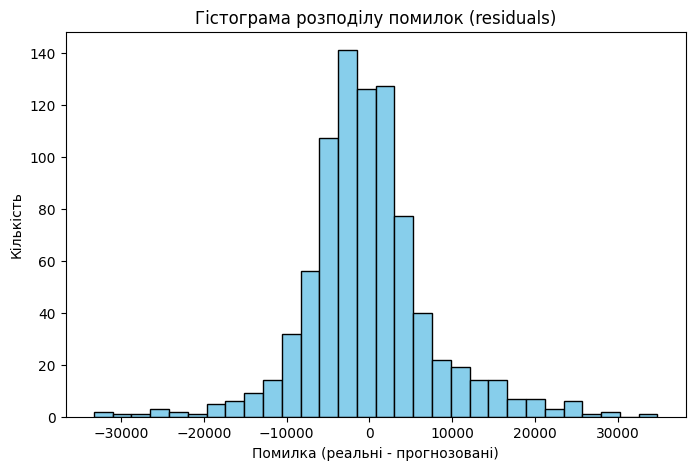

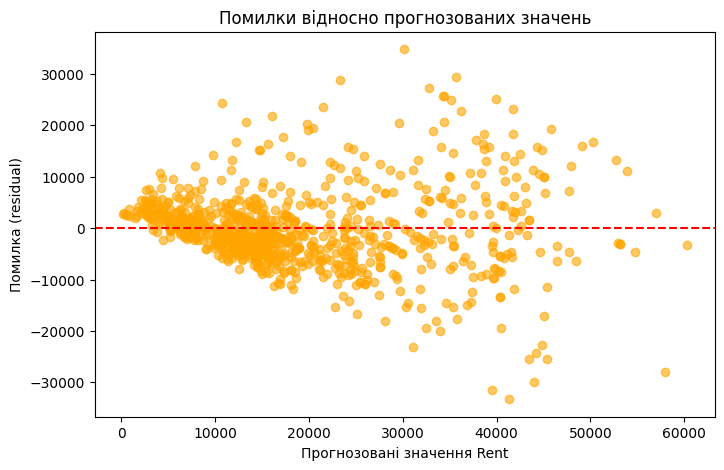

Стандартне відхилення помилок по прогнозованих діапазонах:


C:\Users\user\AppData\Local\Temp\ipykernel_18960\4287099571.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



pred
(188.909, 8997.198]       2822.231204
(8997.198, 14179.44]      4769.586957
(14179.44, 18476.592]     5431.502079
(18476.592, 29360.37]     7805.699643
(29360.37, 60243.384]    12892.637760
Name: residual, dtype: float64

5 прогнозів з найбільшими помилками:
3962    34814.426019
549     33293.860385
904     31553.919906
598     29995.031778
3520    29352.838662
Name: Rent, dtype: float64

Середня абсолютна помилка по BHK:
BHK
-1.287356     4355.246195
 0.052966     4911.431850
 1.393288     7822.411614
 2.733610    12027.128483
 4.073931     2884.807957
 5.414253     7505.802055
Name: Residual, dtype: float64

Середня абсолютна помилка по місту:
City
City_Bangalore    3864.699609
City_Chennai      4793.287343
City_Delhi        7263.314014
City_Hyderabad    4645.779237
City_Kolkata      4130.610012
City_Mumbai       9290.179853
Name: Residual, dtype: float64

1. Додати додаткові числові ознаки (наприклад, рік побудови, відстань до центру, наявність паркінгу).
2. Спробувати нелінійн

In [62]:

# 1️⃣ Обчислюємо залишки (residuals) для тестових даних
residuals = y_test - y_test_pred

# 2️⃣ Гістограма розподілу помилок
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title("Гістограма розподілу помилок (residuals)")
plt.xlabel("Помилка (реальні - прогнозовані)")
plt.ylabel("Кількість")
plt.show()

# 3️⃣ Scatter plot помилок відносно прогнозованих значень
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Помилки відносно прогнозованих значень")
plt.xlabel("Прогнозовані значення Rent")
plt.ylabel("Помилка (residual)")
plt.show()

# Чи росте помилка з ростом прогнозованого значення?
residuals_std_by_pred = pd.DataFrame({'pred': y_test_pred, 'residual': residuals})
print("Стандартне відхилення помилок по прогнозованих діапазонах:")
print(residuals_std_by_pred.groupby(pd.qcut(residuals_std_by_pred['pred'], 5))['residual'].std())

# 4️⃣ 5 прогнозів з найбільшими помилками
largest_errors = residuals.abs().sort_values(ascending=False).head(5)
print("\n5 прогнозів з найбільшими помилками:")
print(largest_errors)

# 5️⃣ Аналіз помилок за типами житла (наприклад, по BHK або місту)
error_analysis = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'Residual': residuals,
    'BHK': X_test['BHK'],
    'City': X_test.filter(like='City_').idxmax(axis=1)  # Визначаємо місто по one-hot
})

# Середня абсолютна помилка по кількості кімнат
mae_by_bhk = error_analysis.groupby('BHK')['Residual'].apply(lambda x: np.mean(np.abs(x)))
print("\nСередня абсолютна помилка по BHK:")
print(mae_by_bhk)

# Середня абсолютна помилка по місту
mae_by_city = error_analysis.groupby('City')['Residual'].apply(lambda x: np.mean(np.abs(x)))
print("\nСередня абсолютна помилка по місту:")
print(mae_by_city)

# 6️⃣ Наступні кроки для поліпшення моделі:
next_steps = """
1. Додати додаткові числові ознаки (наприклад, рік побудови, відстань до центру, наявність паркінгу).
2. Спробувати нелінійні моделі .
3. Використати взаємодії між ознаками (BHK*Size, City*Area_Type).
"""
print(next_steps)
